## 1. 데이터, 패키지 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer                          

from sklearn.compose import ColumnTransformer,make_column_transformer

from sklearn.decomposition import PCA

In [2]:
train = pd.read_csv("PJT002_train.csv", encoding = 'utf8')

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 2. 전처리

In [3]:
# 건물 승인일자 자르는 함수 (소수점 포함 10자리인 글자만 찾아 자르기)

def func(x):
    if len(str(x)) == 10:
        return str(x)[:4]

In [4]:
train['year_athrztn'] = train['dt_of_athrztn'].apply(func)

In [5]:
train['year_athrztn'].unique()

array([None, '2000', '2015', '1994', '1992', '1997', '2010', '2002',
       '2003', '2013', '2014', '1988', '2004', '2016', '1995', '1989',
       '2008', '1999', '2009', '1993', '2006', '2011', '1984', '1991',
       '2005', '2007', '2018', '1998', '1976', '1930', '1971', '1926',
       '1946', '1990', '1996', '1958', '1960', '1982', '2012', '2017',
       '1935', '1962', '1979', '1934', '2001', '1957', '1953', '1947',
       '1983', '1967', '1945', '1985', '1987', '1964', '1980', '1978',
       '1913', '1950', '1961', '1986', '1915', '1943', '1975', '1952',
       '1974', '1965', '1970', '1977', '1956', '1981', '1972', '1969',
       '1973', '1924', '1920', '1900', '1966', '1925', '1940', '1944',
       '1939', '1936', '1968', '1954', '1938', '1933', '1955', '1959',
       '1963', '1949', '1914', '1942', '1932', '1850', '1948', '1923',
       '1951', '1927', '1931', '1937', '1917', '1904', '1878', '1941',
       '1921', '1884', '1910', '1912', '1902', '1901', '1929', '1890',
       '

In [6]:
train_data = [train]

In [7]:
# 지상층 카테고리화

for dataset in train_data:
    dataset.loc[dataset['ttl_grnd_flr'] == 0, 'ground_floor'] = 0,
    dataset.loc[(dataset['ttl_grnd_flr'] >= 1) &  (dataset['ttl_grnd_flr'] <= 10), 'ground_floor'] = 10, 
    dataset.loc[(dataset['ttl_grnd_flr'] > 10) &  (dataset['ttl_grnd_flr'] <= 20), 'ground_floor'] = 20,
    dataset.loc[(dataset['ttl_grnd_flr'] > 20) &  (dataset['ttl_grnd_flr'] <= 30), 'ground_floor'] = 30,
    dataset.loc[(dataset['ttl_grnd_flr'] > 30) &  (dataset['ttl_grnd_flr'] <= 40), 'ground_floor'] = 40,
    dataset.loc[(dataset['ttl_grnd_flr'] > 40) &  (dataset['ttl_grnd_flr'] <= 55), 'ground_floor'] = 55,
    dataset.loc[dataset['ttl_grnd_flr'] > 55, 'ground_floor'] = 56

In [8]:
# 지하층 카테고리화

for dataset in train_data:
    dataset.loc[dataset['ttl_dwn_flr'] == 0, 'ground_floor'] = 0,
    dataset.loc[(dataset['ttl_dwn_flr'] >= 1) &  (dataset['ttl_dwn_flr'] <= 4), 'down_floor'] = 4, 
    dataset.loc[(dataset['ttl_dwn_flr'] > 4) &  (dataset['ttl_dwn_flr'] <= 10), 'down_floor'] = 10,
    dataset.loc[(dataset['ttl_dwn_flr'] > 10) &  (dataset['ttl_dwn_flr'] <= 20), 'down_floor'] = 20,
    dataset.loc[dataset['ttl_dwn_flr'] > 20, 'down_floor'] = 21

In [9]:
# 건물 채수 카테고리화

for dataset in train_data:
    dataset.loc[dataset['bldng_cnt'] == 0, 'ground_floor'] = 0,
    dataset.loc[(dataset['bldng_cnt'] >= 1) &  (dataset['bldng_cnt'] <= 5), 'building_number'] = 5, 
    dataset.loc[(dataset['bldng_cnt'] > 5) &  (dataset['bldng_cnt'] <= 10), 'building_number'] = 10,
    dataset.loc[(dataset['bldng_cnt'] > 10) &  (dataset['bldng_cnt'] <= 20), 'building_number'] = 20,
    dataset.loc[(dataset['bldng_cnt'] > 20) &  (dataset['bldng_cnt'] <= 30), 'building_number'] = 30,
    dataset.loc[dataset['bldng_cnt'] > 30, 'building_number'] = 311

In [15]:
train.head()

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,year_athrztn,ground_floor,down_floor,building_number
0,2017-10-20 05:54,Y,단독주택,블록구조,3,69.42,69.42,0.0,1977,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,5.0
1,2018-09-30 08:26,N,NaN,NaN,3,46.29,46.29,0.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,5.0
2,2016-10-30 14:57,Y,공동주택,철근콘크리트구조,1,583.80,2516.76,1446.0,2.00011e+07,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2000,0.0,NaN,5.0
3,2016-06-14 05:23,N,단독주택,일반목구조,2,48.92,48.92,0.0,1936,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,5.0
4,2018-04-22 05:38,N,NaN,NaN,2,0.00,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0


## 3. 상관관계 있는 것끼리 묶고, 공통 nan 값 계산 

In [10]:
mydata = train[['bldng_us', 'bldng_archtctr', 'bldng_ar', 'ttl_ar', 'lnd_ar', 'year_athrztn', 'bldng_us_clssfctn', 'jmk','rgnl_ar_nm','rgnl_ar_nm2','lnd_us_sttn_nm','rd_sd_nm', 'ground_floor', 'down_floor', 'building_number']]
mydata.head()

,bldng_us,bldng_archtctr,bldng_ar,ttl_ar,lnd_ar,year_athrztn,bldng_us_clssfctn,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,ground_floor,down_floor,building_number
0,단독주택,블록구조,69.42,69.42,0.0,None,주거용,대,자연녹지지역,지정되지않음,단독,세로한면(불),0.0,NaN,5.0
1,NaN,NaN,46.29,46.29,0.0,None,NaN,대,계획관리지역,지정되지않음,단독,세로한면(가),0.0,NaN,5.0
2,공동주택,철근콘크리트구조,583.80,2516.76,1446.0,2000,주거용,답,제2종일반주거지역,지정되지않음,연립,중로한면,0.0,NaN,5.0
3,단독주택,일반목구조,48.92,48.92,0.0,None,주거용,대,제1종일반주거지역,지정되지않음,단독,세로한면(불),0.0,NaN,5.0
4,NaN,NaN,0.00,0.00,0.0,None,NaN,임,자연환경보전지역,지정되지않음,자연림,세로한면(불),NaN,NaN,5.0


Text(0.5, 1, 'Correlation with Missing Values')

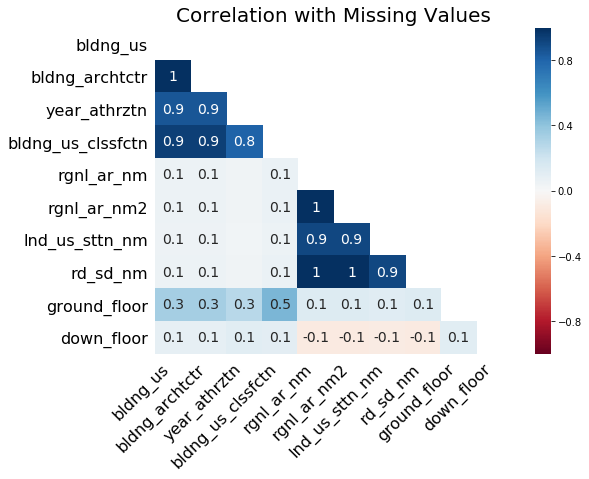

In [11]:
import missingno as msno
missingdata_df = mydata.columns[mydata.isnull().any()].tolist()
msno.heatmap(mydata[missingdata_df], figsize=(8,6))
plt.title("Correlation with Missing Values", fontsize = 20)

bldng_archtctr, blding_us_clssfctn, year_athrztn

rgnl_ar_nm, rgnl_ar_nm2, rd_sd_nm

In [14]:
# 상관 관계 있는 것끼리 nan인 값 추출하기

train.loc[train.isnull()['bldng_archtctr']& train.isnull()['bldng_us_clssfctn'] & train.isnull()['year_athrztn']]

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,year_athrztn,ground_floor,down_floor,building_number
1,2018-09-30 08:26,N,NaN,NaN,3,46.290,46.2900,0.00,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,5.0
4,2018-04-22 05:38,N,NaN,NaN,2,0.000,0.0000,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
6,2015-09-02 01:35,N,NaN,NaN,1,84.000,84.0000,495.00,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,5.0
8,2018-03-04 08:51,N,NaN,NaN,8,102.360,102.3600,0.00,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,10.0
11,2014-12-05 07:43,N,NaN,NaN,3,44.970,44.9700,0.00,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,5.0
15,2016-09-29 23:05,N,NaN,NaN,2,551.840,819.6000,4946.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
21,2015-08-18 21:39,N,NaN,NaN,6,89.250,89.2500,0.00,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,10.0
22,2016-03-25 17:28,N,NaN,NaN,1,102.020,148.8200,998.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
25,2015-12-19 02:52,N,NaN,NaN,2,42.980,42.9800,0.00,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,5.0
27,2014-08-01 03:24,N,NaN,NaN,3,33.060,33.0600,0.00,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,None,0.0,NaN,5.0


In [15]:
# 상관 관계 있는 것끼리 nan인 값 추출하기

train.loc[train.isnull()['rgnl_ar_nm']& train.isnull()['rgnl_ar_nm2'] & train.isnull()['rd_sd_nm']]

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,year_athrztn,ground_floor,down_floor,building_number
106,2015-12-24 16:22,N,NaN,NaN,2,0.000,0.000,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
184,2014-07-03 15:14,N,NaN,NaN,4,0.000,0.000,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
247,2016-09-28 12:51,N,NaN,NaN,2,0.000,0.000,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
328,2014-07-03 12:11,N,NaN,NaN,1,0.000,0.000,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
470,2018-01-30 03:37,N,NaN,NaN,3,0.000,0.000,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
478,2017-07-11 16:03,N,NaN,NaN,3,0.000,0.000,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
538,2018-06-10 05:07,N,NaN,NaN,2,0.000,0.000,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
539,2015-03-19 10:23,N,NaN,NaN,1,0.000,0.000,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,5.0
542,2017-08-02 09:06,N,단독주택,일반목구조,1,52.890,52.890,0.00,1.96003e+07,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1960,NaN,NaN,5.0
544,2016-07-13 06:25,N,공장,일반철골구조,4,890.510,1591.720,1362.00,2.00112e+07,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2001,0.0,NaN,5.0
